# Level 5
This notebooks explains the process of obtaining the prior mean and variance estimates for Level 5. It also shows how to generate the figures included in the manuscript.

In [37]:
# Imports
import numpy as np
from bayesian_agent import BayesianReplica
from estimate_agent import estimate_agent, find_mu
import pandas as pd
from concat_mean import concat_mean
from data_gen_meanPrior import data_gen_meanPrior
from data_gen_varPrior import data_gen_varPrior
from concat_var_mle import concat_var_mle
import matplotlib.pyplot as plt
import os

# Imports for ease of visualization
import warnings
import matplotlib as mpl
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch
import seaborn as sns

# Parameters for plotting
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="colorblind", font_scale=1.5, rc=custom_params)

In [38]:
data_dir = "../data"
experiment_name = "level_5"
source_of_data = "website_training_output"

folder_exp_data = os.path.join(
    data_dir,
    experiment_name,
    source_of_data,
)

In [ ]:
# Generate data for mean prior estimation
# We have a set of files from experiments with different number of trials
# We will estimate the mean prior from each of these files and generate new data files

# Currently not using this

#data_gen_meanPrior()

file_list = ['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '58', '59', '60', '61', '62', '63']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# 0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000
#These are the files for mu

for i in range(len(file_list)):
    file = f'{folder_exp_data}/experiment_results ({file_list[i]}).csv'
    #mean = find_mu(file)
    # data_gen_varPrior(mean, out_path=f'var_mean_exp5_data_{file_id}.csv')
    file = f'../data/level_5/website_input/ipt/var_mean_exp5_data_{file_list[i]}.csv'
    tmp = pd.read_csv(file)
    tmp.to_csv(f'../data/level_5/website_input/experiment_input_{trials[i]}_trials.csv')
    print(tmp)

         Trial    S1_val  S1_std    S2_val  S2_std
0            1 -0.855488     0.7  2.894512    0.05
1            2  0.894512     0.7  2.894512    0.05
2            3  2.644512     0.7  2.894512    0.05
3            4  0.394512     0.7  2.894512    0.05
4            5 -0.605488     0.7  2.894512    0.05
...        ...       ...     ...       ...     ...
114835  114836  1.144512     8.0  2.894512    0.05
114836  114837  1.394512     8.0  2.894512    0.05
114837  114838  0.644512     8.0  2.894512    0.05
114838  114839  6.144512     8.0  2.894512    0.05
114839  114840  5.394512     8.0  2.894512    0.05

[114840 rows x 5 columns]
         Trial    S1_val  S1_std    S2_val  S2_std
0            1 -1.580283     0.7  2.169717    0.05
1            2  0.169717     0.7  2.169717    0.05
2            3  1.919717     0.7  2.169717    0.05
3            4 -0.330283     0.7  2.169717    0.05
4            5 -1.330283     0.7  2.169717    0.05
...        ...       ...     ...       ...     ...
1148

In [ ]:
file_list_2 = ['42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']
file_list_2_temp = ['64', '65', '66', '67', '68', '69']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# Rename files into readable names
for i in range(len(file_list_2)):
    # Open experiment results file
    file = f'{folder_exp_data}/experiment_results ({file_list_2[i]}).csv'
    # Read it as pandas
    tmp = pd.read_csv(file)
    # Rename it and save with readable name
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_{trials[i]}_trials.csv')
    
for i in range(len(file_list_2_temp)):
    file_id = file_list_2_temp[i]
    print(file_id)
    print(trials[16+i])
    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    tmp = pd.read_csv(file)
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_{trials[16+i]}_trials.csv')



In [58]:
mu_list = []
sigma_list = []
internal_std_list = []
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

for i in range(len(trials)):
    # Open experiment results file
    file = f'{folder_exp_data}/experiment_results/experiment_results_{trials[i]}_trials.csv'
    # Get the mean estimate
    mean = find_mu(file)
    # Group and sort values
    data = concat_var_mle(file)
    # Estimate agent parameters
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mean)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)
print(i)
'''
for i in range(len(file_list_2_temp)):
    file_id = file_list_2_temp[i]
    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    tmp = pd.read_csv(file)
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_{trials[16+i]}_trials.csv')
    mean = find_mu(file)
    file_id = file_list_2_temp[i]
    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    data = concat_var_mle(file)
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mean)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)
'''

21


"\nfor i in range(len(file_list_2_temp)):\n    file_id = file_list_2_temp[i]\n    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'\n    tmp = pd.read_csv(file)\n    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_{trials[16+i]}_trials.csv')\n    mean = find_mu(file)\n    file_id = file_list_2_temp[i]\n    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'\n    data = concat_var_mle(file)\n    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mean)\n    mu_list.append(mu_prior)\n    sigma_list.append(sigma_prior_mle)\n    internal_std_list.append(sigma_internal_mle)\n"

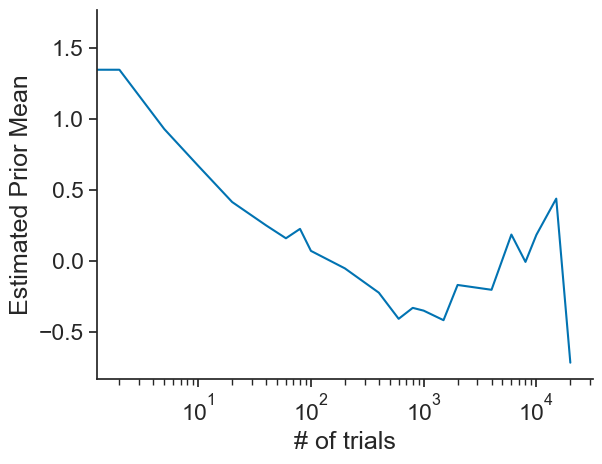

In [59]:
plt.plot(trials, mu_list)
plt.xscale('log')
plt.xlabel('# of trials')
plt.ylabel('Estimated Prior Mean')
#plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(False)
plt.show()

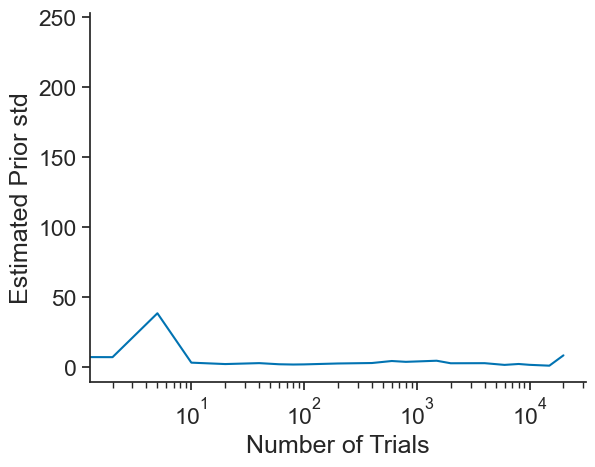

In [42]:

plt.plot(trials, sigma_list)
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior std')
#plt.title('Estimated Prior Standard Deviation vs Number of Trials')
plt.grid(False)
plt.show()

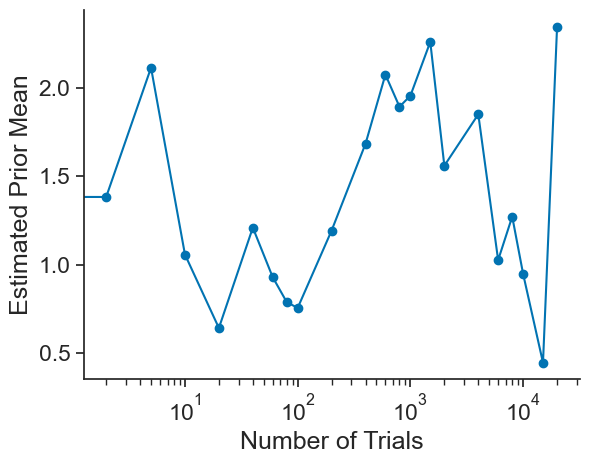

In [43]:
plt.plot(trials, internal_std_list, marker='o')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
#plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(False)
plt.show()

In [44]:
# def mse(mu_list, mu_list_agent):
#     mu_array = np.array(mu_list[:len(mu_list_agent)])  # match lengths
#     agent_array = np.array(mu_list_agent)
#     return np.mean((mu_array - agent_array) ** 2)

# def simulate_agent(mu_final, sigma_final, mu_init, sigma_init, internal_std, measurement_noise):
#     agent = BayesianReplica(mu_init, sigma_init, internal_std)
#     mu_list_agent = []
    
#     for n_trials in trials:
#         mu_prior, sigma_prior = agent.get_prior()
#         mu_list_agent.append(mu_prior)
#         agent.reset_agent()
#         agent.train_agent_kalmann_m_noise_z_var(n_trials, mu_final, sigma_final, measurement_noise)
    
#     return mu_list_agent

# from scipy.optimize import minimize_scalar

# def objective(noise):
    
#     mse_total = 0
#     for _ in range(10):
#         mu_list_agent = simulate_agent(0.48, 0.87, 2.89, 1.136, 0.15, noise)
#         mse_value = mse(mu_list, mu_list_agent)
#         mse_total += mse_value
#     mse_avg = mse_total / 10
#     return mse_avg

# res = minimize_scalar(objective, bounds=(0.1, 10.0), method='bounded')
# best_noise = res.x
# print("Best measurement noise:", best_noise)


In [45]:
# def estimate_noise():
#     res = minimize_scalar(
#         objective,
#         bounds=(1.0, 3.0),
#         method='bounded'
#     )
#     return res.x

# n_boot = 100         # 200–500 is usually enough
# noise_boot = np.zeros(n_boot)

# for b in range(n_boot):
#     noise_boot[b] = estimate_noise()


# alpha = 0.05

# ci_low = np.percentile(noise_boot, 100 * alpha / 2)
# ci_high = np.percentile(noise_boot, 100 * (1 - alpha / 2))

# print(f"Measurement noise estimate: {best_noise:.4f}")
# print(f"95% bootstrap CI: [{ci_low:.4f}, {ci_high:.4f}]")

Finding the mean after N trials

In [46]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_agent.append(mu_prior)
    sigma_list_agent.append(sigma_prior)
    agent.reset_agent()
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)


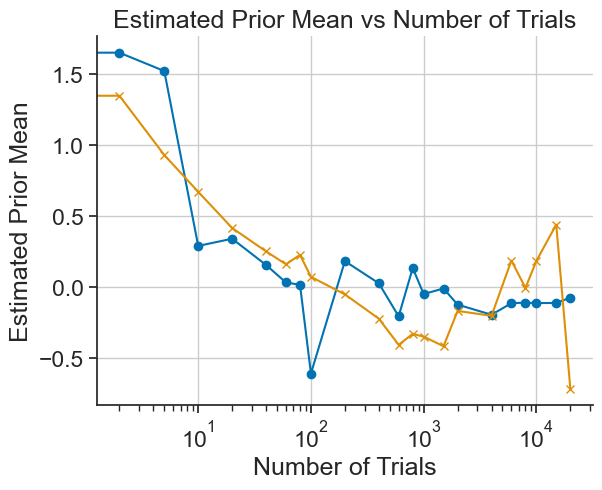

In [47]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

In [48]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])
print(sigma_final)
internal_std = np.mean(internal_std_list)
measurement_noise =2

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
k=50
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_agent.append(mu_prior)
    sigma_list_agent.append(sigma_prior)
    agent.reset_agent()
    # Obtain mean
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    # Retrain and replace variance
    agent.train_agent_EKF_sq_residuals(n_trials, mu_final, sigma_final, measurement_noise)

1.7149081389375667


In [49]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])
print(sigma_final)
internal_std = np.mean(internal_std_list)
measurement_noise =2

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
k=50
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_agent.append(mu_prior)
    sigma_list_agent.append(sigma_prior)
    agent.reset_agent()
    # No retraining - kept Kalman variance
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)

1.7149081389375667


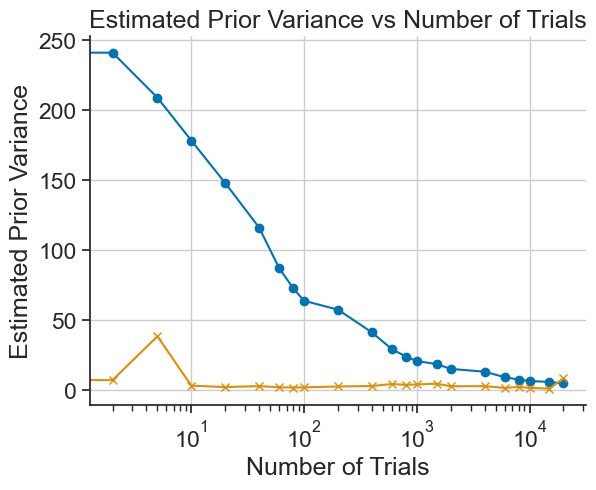

In [50]:
plt.plot(trials, sigma_list_agent, marker='o') # agent variance estimate
plt.plot(trials, sigma_list, marker='x') #variance estimation for given number of trials - ground truth
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

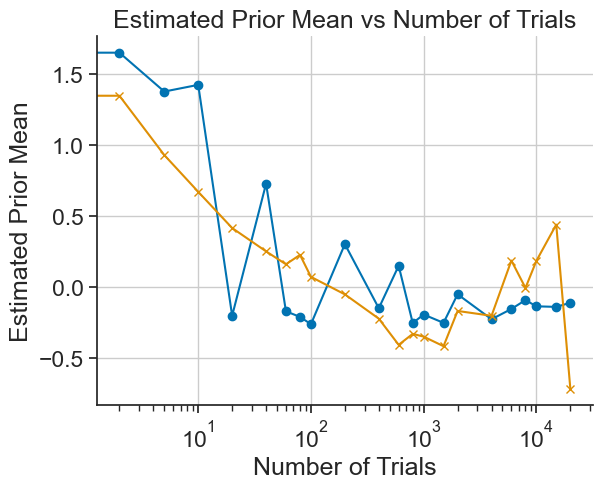

In [51]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

In [52]:
def mse(true_list, pred_list):
    # Make sure both lists have the same length
    min_len = min(len(true_list), len(pred_list))
    return np.mean((np.array(true_list[:min_len]) - np.array(pred_list[:min_len]))**2)

In [53]:
k_values = np.linspace(1, 100, 20)  # Try 20 values from 1 to 100, adjust range as needed
best_k = None
lowest_mse = float('inf')

for k in k_values:
    agent = BayesianReplica(mu_init, sigma_init, internal_std)
    mu_list_agent = []
    sigma_list_agent = []

    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent.append(mu_prior)
        sigma_list_agent.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_absolute(n_trials, mu_final, sigma_final, measurement_noise, k)

    current_mse = mse(sigma_list, sigma_list_agent)
        
    if current_mse < lowest_mse:
        lowest_mse = current_mse
        best_k = k

print("Best k:", best_k)
print("Lowest MSE:", lowest_mse)


TypeError: BayesianReplica.train_agent_EKF_absolute() takes 5 positional arguments but 6 were given